In [1]:
from util.loader import load_to_notebook

lego = load_to_notebook()
lego

/home/mick/IdeaProjects/LegoPriceResearch/util/loader.py:15: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path, delimiter=delimiter, encoding="utf-8")


Execution time for 'load_from_csv' took 19.515865564346313 seconds
Execution time for 'load_to_notebook' took 19.51593255996704 seconds


,year,Theme name,Sets Name,Sets URL,Part category,Part name,Part material,Part color,RGB,Is Transparent?,Part URL,Set Price,Number of reviews,Star rating
0,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Dark Blue,0A3463,False,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
1,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Trans-Dark Blue,0020A0,True,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
2,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Dark Blue,0A3463,False,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
3,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Bright Green,4B9F4A,False,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
4,2016,Skylines,London,https://cdn.rebrickable.com/media/sets/21034-1...,Plates,Plate 4 x 8,Plastic,Bright Light Blue,9FC3E9,False,https://cdn.rebrickable.com/media/parts/elemen...,"53,3556",23,"4,7"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698978,2016,Fire,Fire Ladder Truck,https://cdn.rebrickable.com/media/sets/60107-1...,Plates Round Curved and Dishes,Plate Round 1 x 1 with Solid Stud,Plastic,Trans-Clear Opal,FCFCFC,True,https://cdn.rebrickable.com/media/parts/elemen...,"24,8126",11,"4,5"
4698979,2016,Fire,Fire Ladder Truck,https://cdn.rebrickable.com/media/sets/60107-1...,Plates Round Curved and Dishes,Plate Round 1 x 1 with Solid Stud,Plastic,Medium Dark Pink,F785B1,False,https://cdn.rebrickable.com/media/parts/elemen...,"24,8126",11,"4,5"
4698980,2016,Fire,Fire Ladder Truck,https://cdn.rebrickable.com/media/sets/60107-1...,Plates Round Curved and Dishes,Plate Round 1 x 1 with Solid Stud,Plastic,Pastel Blue,5AC4DA,False,https://cdn.rebrickable.com/media/parts/elemen...,"24,8126",11,"4,5"
4698981,2016,Fire,Fire Ladder Truck,https://cdn.rebrickable.com/media/sets/60107-1...,Plates Round Curved and Dishes,Plate Round 1 x 1 with Solid Stud,Plastic,Brown,583927,False,https://cdn.rebrickable.com/media/parts/elemen...,"24,8126",11,"4,5"


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
lego.drop(columns=['Sets URL', 'Part URL'], axis=1, inplace=True)
lego.dropna(axis=0, inplace=True)
lego['Star rating'] = lego['Star rating'].apply(lambda x: x.replace(',', '.'))

numeric_features = ['Set Price', 'Number of reviews', 'Star rating', 'year']
for feature in numeric_features:
    lego[feature] = pd.to_numeric(lego[feature].apply(lambda x: x.replace(",", "") if type(x) not in (int, float) else x))

In [4]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
text_features = [feature for feature in lego.columns if feature not in numeric_features]

for feature in text_features:
    encoders[feature] = LabelEncoder()
    lego[feature] = encoders[feature].fit_transform(lego[feature])

In [5]:
lego.fillna(0)
lego

,year,Theme name,Sets Name,Part category,Part name,Part material,Part color,RGB,Is Transparent?,Set Price,Number of reviews,Star rating
0,2016,73,248,28,2396,5,17,7,0,533556,23,4.7
1,2016,73,248,28,2396,5,117,0,1,533556,23,4.7
2,2016,73,248,28,2396,5,17,7,0,533556,23,4.7
3,2016,73,248,28,2396,5,3,18,0,533556,23,4.7
4,2016,73,248,28,2396,5,4,54,0,533556,23,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4698978,2016,38,156,30,2413,5,116,122,1,248126,11,4.5
4698979,2016,38,156,30,2413,5,69,115,0,248126,11,4.5
4698980,2016,38,156,30,2413,5,84,25,0,248126,11,4.5
4698981,2016,38,156,30,2413,5,8,23,0,248126,11,4.5


<Axes: >

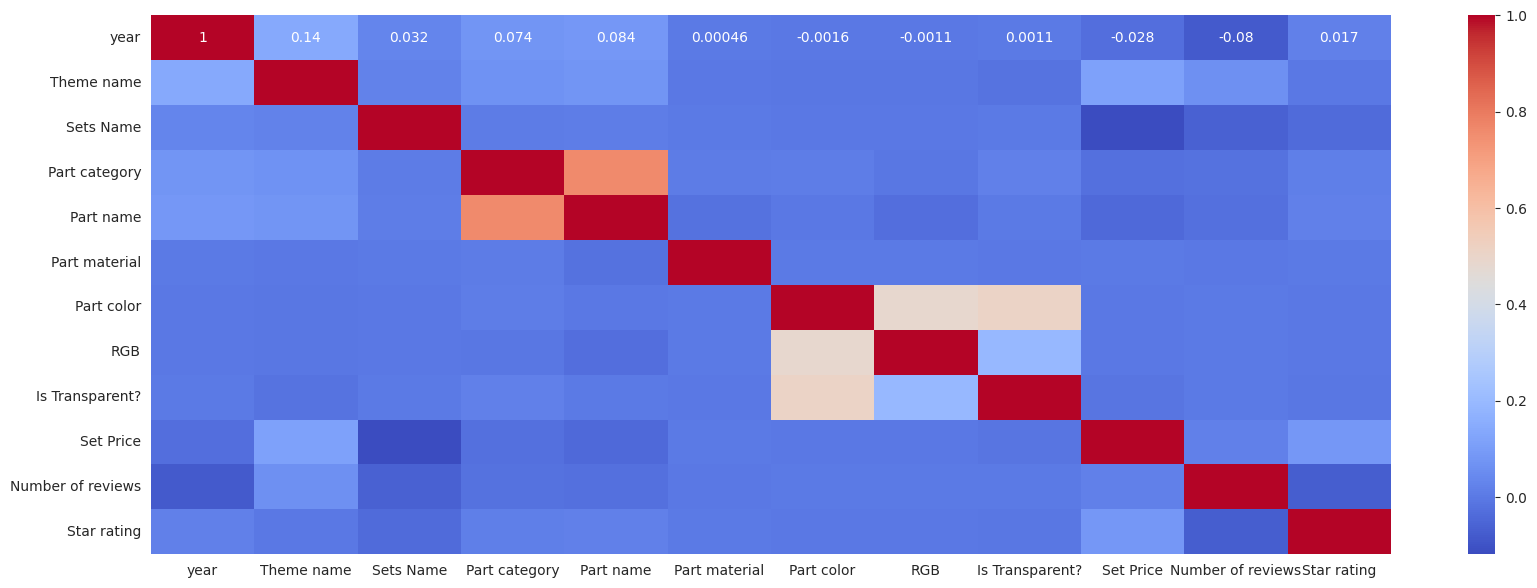

In [6]:
plt.figure(figsize=(20,7))
sns.heatmap(lego.corr(), cmap="coolwarm", annot=True)

/home/mick/IdeaProjects/LegoPriceResearch/venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

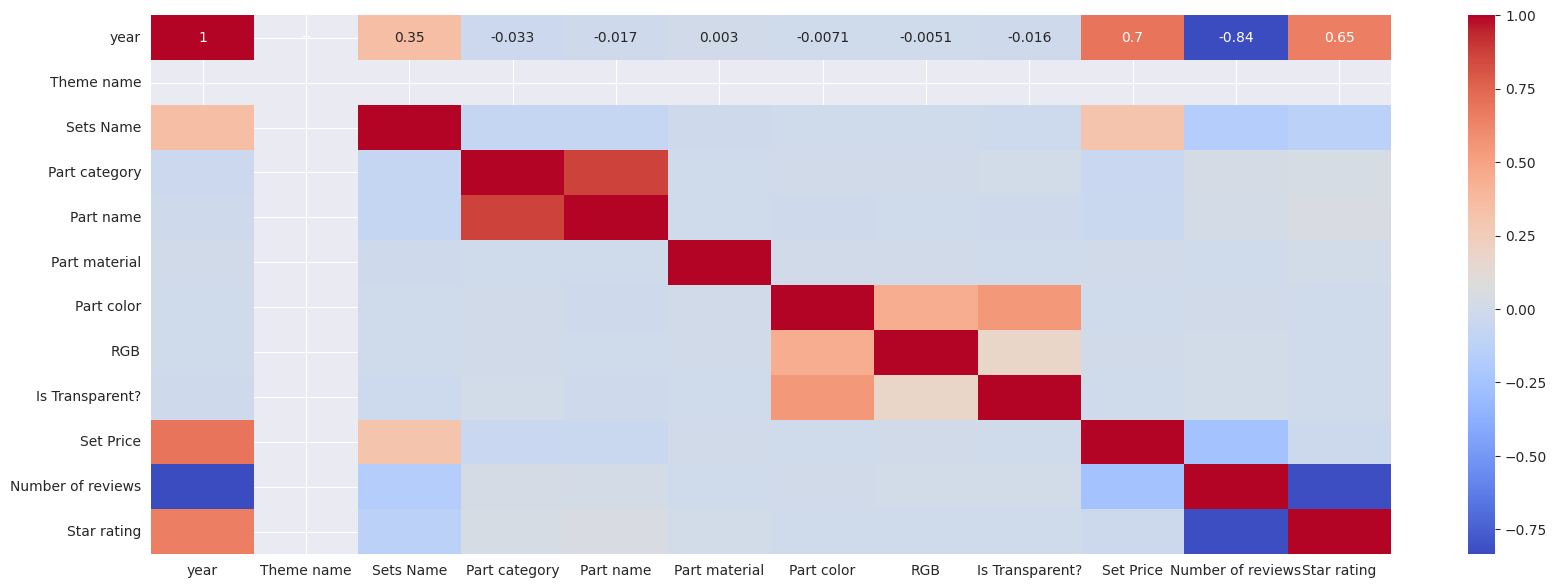

In [7]:
plt.figure(figsize=(20,7))
sns.heatmap(lego[lego["Theme name"] == 73].corr(), cmap="coolwarm", annot=True)

In [19]:
wtf = lego[lego['Theme name'] == 5][['Set Price']]
wtf

,Set Price
77439,192264266667
77440,192264266667
77441,192264266667
77442,192264266667
77443,192264266667
...,...
3694529,192264266667
3694530,192264266667
3694531,192264266667
3694532,192264266667


In [20]:
len(wtf[wtf['Set Price'] == 192264266667])

10570

In [8]:
from pandas.plotting import scatter_matrix

matrix = scatter_matrix(lego, figsize=(12, 8))

Error in callback <function flush_figures at 0x7fc5e9b07ac0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 